## Test of time operation for SRB temporary dataset 

In [143]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

df = pd.read_hdf('SRB.h5', 'Rat_Behavior').set_index('index')
df7 = pd.read_hdf('SRB7.h5', 'Rat_Behavior').set_index('index')

In [64]:
df.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,...,clockwise,theta,U,UM,MotiveExpTimeSecs,visible,speed,subU,subUM,dtime
index,,,,,,,,,,,,,,,,,,,,,
1,17041,71.004171,0.072631,0.095450,-0.038446,0.943570,-0.267228,-0.194803,2,0.004166,...,-1,0.000469,-6.446231,-6.361802,59.129167,1,-7.0,-0.553769,-0.638198,0.004166
2,17042,71.008338,0.072648,0.095457,-0.038431,0.943722,-0.267010,-0.194368,2,0.004167,...,-1,0.000474,-6.523562,-6.319288,59.129167,1,-7.0,-0.476438,-0.680712,0.004167
3,17043,71.012505,0.072666,0.095464,-0.038417,0.943887,-0.266747,-0.193931,2,0.004167,...,-1,0.000479,-6.586125,-6.263810,59.129167,1,-7.0,-0.413875,-0.736190,0.004167
4,17044,71.016671,0.072677,0.095470,-0.038406,0.944003,-0.266652,-0.193512,2,0.004166,...,-1,0.000449,-6.177022,-6.187017,59.129167,1,-7.0,-0.822978,-0.812983,0.004166
5,17045,71.020838,0.072688,0.095476,-0.038395,0.944118,-0.266553,-0.193101,2,0.004167,...,-1,0.000443,-6.087006,-6.083644,59.129167,1,-7.0,-0.912994,-0.916356,0.004167


In [65]:
df7.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,...,lz2,clockwise,theta,U,UM,MotiveExpTimeSecs,visible,speed,subU,subUM
index,,,,,,,,,,,,,,,,,,,,,
0,17328,72.200005,0.002214,0.099829,0.068062,-0.034924,-0.057514,0.997480,7,0.004167,...,0.999416,-1,0.000832,-11.437400,-11.391357,58.804167,1,-28.0,-16.562600,-16.608643
1,17329,72.204171,0.002166,0.099827,0.068060,-0.035761,-0.057798,0.997434,7,0.004166,...,0.999388,-1,0.000839,-11.540101,-11.417556,58.804167,1,-28.0,-16.459899,-16.582444
2,17330,72.208338,0.002119,0.099825,0.068061,-0.036647,-0.058029,0.997388,7,0.004167,...,0.999358,-1,0.000889,-12.230178,-11.438255,58.804167,1,-28.0,-15.769822,-16.561745
3,17331,72.212505,0.002071,0.099822,0.068059,-0.037493,-0.058311,0.997341,7,0.004167,...,0.999326,-1,0.000848,-11.664497,-11.456868,58.804167,1,-28.0,-16.335503,-16.543132
4,17332,72.216671,0.002024,0.099819,0.068056,-0.038313,-0.058639,0.997291,7,0.004166,...,0.999294,-1,0.000823,-11.316994,-11.478388,58.804167,1,-28.0,-16.683006,-16.521612


In [133]:
# df7['limmin'], df7['limmax'] = 0, 0

# #7/-7
# df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-7)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-7)
# df7['limmin'] = np.where(df7['changemin']==True, -10, df7['limmin'])
# df7['limmax'] = np.where(df7['changemax']==True, -3 , df7['limmax'])

# df7['changemin'] = (df7['limmin']==0) & (df7['speed']==7)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']==7)
# df7['limmin'] = np.where(df7['changemin']==True, 3 , df7['limmin'])
# df7['limmax'] = np.where(df7['changemax']==True, 10, df7['limmax'])

# print(df7.limmax.min())
# print(df7.limmax.max())


In [101]:
# def conditions(val, speed, lim, y):
#     if (val == speed & lim==0):
#         return y
#     else:
#         return 0

# func = np.vectorize(conditions)
# energy_class = func(df7['speed'], 7, ['limmax'], -10)

In [134]:
df7['limmin'], df7['limmax'] = 0, 0

#7/-7
df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-7)
df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-7)
df7['limmin'] = np.where(df7['changemin']==True, -10, df7['limmin'])
df7['limmax'] = np.where(df7['changemax']==True, -3 , df7['limmax'])
df7['changemin'] = (df7['limmin']==0) & (df7['speed']==7)
df7['changemax'] = (df7['limmax']==0) & (df7['speed']==7)
df7['limmin'] = np.where(df7['changemin']==True, 3 , df7['limmin'])
df7['limmax'] = np.where(df7['changemax']==True, 10, df7['limmax'])

#14/-14
df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-14)
df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-14)
df7['limmin'] = np.where(df7['changemin']==True, -16, df7['limmin'])
df7['limmax'] = np.where(df7['changemin']==True, -6 , df7['limmax'])
df7['changemin'] = (df7['limmin']==0) & (df7['speed']== 14)
df7['changemax'] = (df7['limmax']==0) & (df7['speed']== 14)
df7['limmin'] = np.where(df7['changemin']==True,  6 , df7['limmin'])
df7['limmax'] = np.where(df7['changemin']==True,  16, df7['limmax'])

#28/-28
df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-28)
df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-28)
df7['limmin'] = np.where(df7['changemin']==True, -34, df7['limmin'])
df7['limmax'] = np.where(df7['changemin']==True, -20, df7['limmax'])
df7['changemin'] = (df7['limmin']==0) & (df7['speed']== 28)
df7['changemax'] = (df7['limmax']==0) & (df7['speed']== 28)
df7['limmin'] = np.where(df7['changemin']==True,  20, df7['limmin'])
df7['limmax'] = np.where(df7['changemin']==True,  34, df7['limmax'])

print(df7.limmax.min())
print(df7.limmax.max())

-20
16


In [135]:
df7['SRB'] = (df7['U'] > df7['limmin']) & (df7['U'] < df7['limmax'])
print(len(df7))
print(len(df7[df7['SRB']==True]))

15147
8617


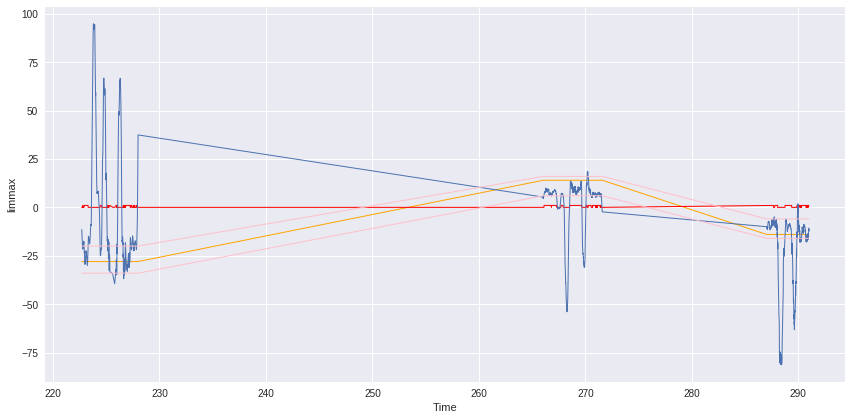

In [142]:
# a, b = 156, 159
# g = sns.FacetGrid(data=df7, size=6, aspect=2, xlim=[a,b], ylim=[-20, 20])
g = sns.FacetGrid(data=df7, size=6, aspect=2)
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "limmin", alpha=1, linewidth=1, color='pink');
g.map(plt.plot, "Time", "limmax", alpha=1, linewidth=1, color='pink');


In [ ]:
DF = pd.DataFrame
for name, dd in df.groupby('session_id'):
    DF = pd.concat([DF, dd], axis=0, ignore_index=True)